# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [1]:
import numpy
from matplotlib import pyplot as plt 

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [14]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        positions[0] = self.pos
        for i in range(n):
            self.pos = numpy.add(self.pos,self.pickStep())
            positions[i+1]=self.pos
        return positions

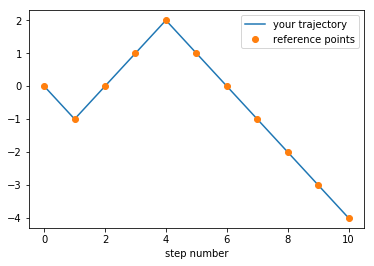

In [15]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

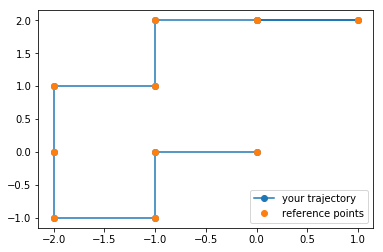

In [16]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

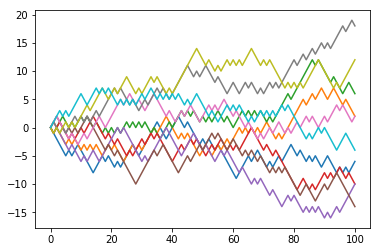

In [5]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


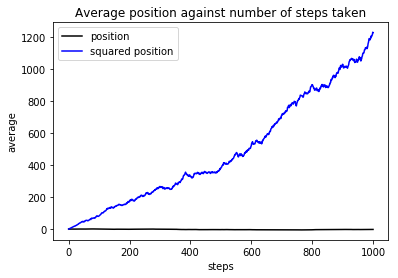

In [6]:
nsteps = 1000
ndim = 1
nwalkers = 100

paths = []
for i in range(nwalkers):
    w = walker(numpy.zeros(ndim))
    ys= w.doSteps(nsteps)
    paths.append(ys)

sqr_paths = [x**2 for x in paths]
avg = numpy.average(paths,axis=0)
sqr_avg = numpy.average(sqr_paths,axis=0)

plt.plot(range(nsteps+1),avg, color = 'black', label = 'position')
plt.plot(range(nsteps+1),sqr_avg, color = 'blue', label = 'squared position')
plt.xlabel('steps')
plt.ylabel('average')
plt.title('Average position against number of steps taken')
plt.legend()

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


In [42]:
nsteps = 100
nwalkers = 400
dimensions = range(2,3)

for ndim in dimensions:
    paths = []
    for i in range(nwalkers):
        w = walker(numpy.zeros(ndim),ndim=ndim)
        ys= w.doSteps(nsteps)[ndim]
        paths.append(ys)
paths[0][0],paths[0][1]

(1.0, 1.0)

## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


[[2.80298401e-01 2.04353219e-01]
 [3.38617348e-01 6.81779509e-01]
 [5.89357823e-01 6.40714035e-01]
 [8.70811863e-01 8.80485103e-02]
 [1.11697640e-01 4.36389734e-01]
 [9.92218630e-01 8.07917051e-02]
 [9.27181065e-01 8.06000269e-01]
 [6.30563475e-01 8.61788541e-01]
 [9.84872631e-02 1.62083212e-01]
 [9.35487001e-02 1.36928674e-01]
 [8.70865185e-01 2.96558840e-01]
 [3.33807072e-01 2.49811484e-01]
 [4.45208064e-01 1.15791551e-01]
 [6.06900965e-01 9.93499151e-01]
 [6.73978546e-01 1.04026596e-01]
 [7.91660899e-01 6.44708036e-01]
 [7.42208875e-01 3.16443687e-01]
 [4.78595924e-01 7.65772459e-01]
 [6.45440393e-02 3.24233898e-01]
 [3.13184490e-01 2.45555315e-01]
 [7.39538904e-01 5.83938886e-01]
 [5.52726761e-01 7.54179111e-01]
 [5.00404339e-01 3.12870206e-01]
 [3.53688499e-01 3.20034377e-01]
 [9.88809659e-02 1.40838306e-01]
 [5.49040506e-01 9.44816519e-01]
 [9.51268674e-01 9.24051595e-01]
 [2.91859858e-01 1.96102535e-01]
 [3.97595871e-01 9.27889313e-01]
 [3.78415757e-01 2.82570947e-02]
 [2.435814

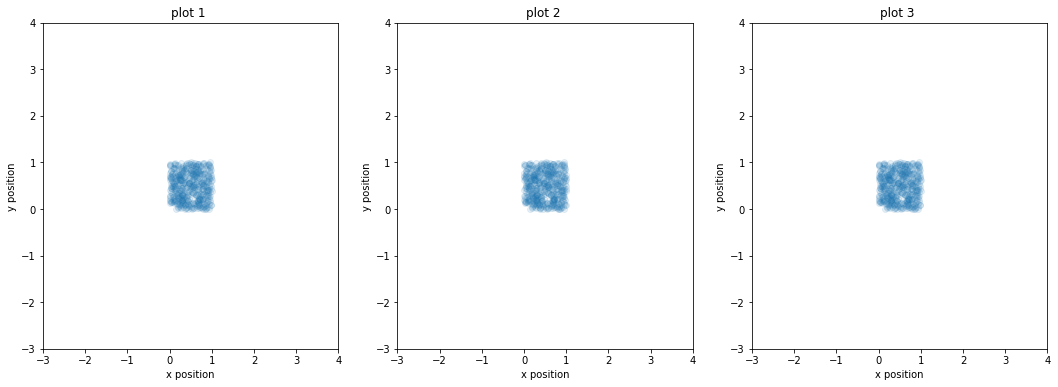

In [21]:
ndim=2
nwalkers=500

rand_pos = numpy.random.uniform(size=(nwalkers, ndim))
print(rand_pos)

# this code is a template to create 3 subplots in one, adapt it to your task!
plt.figure(figsize=(18,6))
for i, nsteps in enumerate([10,100,500]):
    plt.subplot(131+i)
    plt.xlim((-3, 4))
    plt.ylim((-3, 4))
    plt.xlabel('x position')
    plt.ylabel('y position')
    plt.title("plot {} ".format(i+1))    
    plt.scatter(rand_pos[:,0], rand_pos[:,1], alpha=0.1)